<a href="https://colab.research.google.com/github/Shubham0Rajput/Open-contributions/blob/master/Shubham_OpenCV_DepthMaping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIBRARIES**

In [ ]:
#libs
import numpy as np
import cv2
import sys, os
from matplotlib import pyplot as plt

#mounting drive with colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**FIRST CODE**

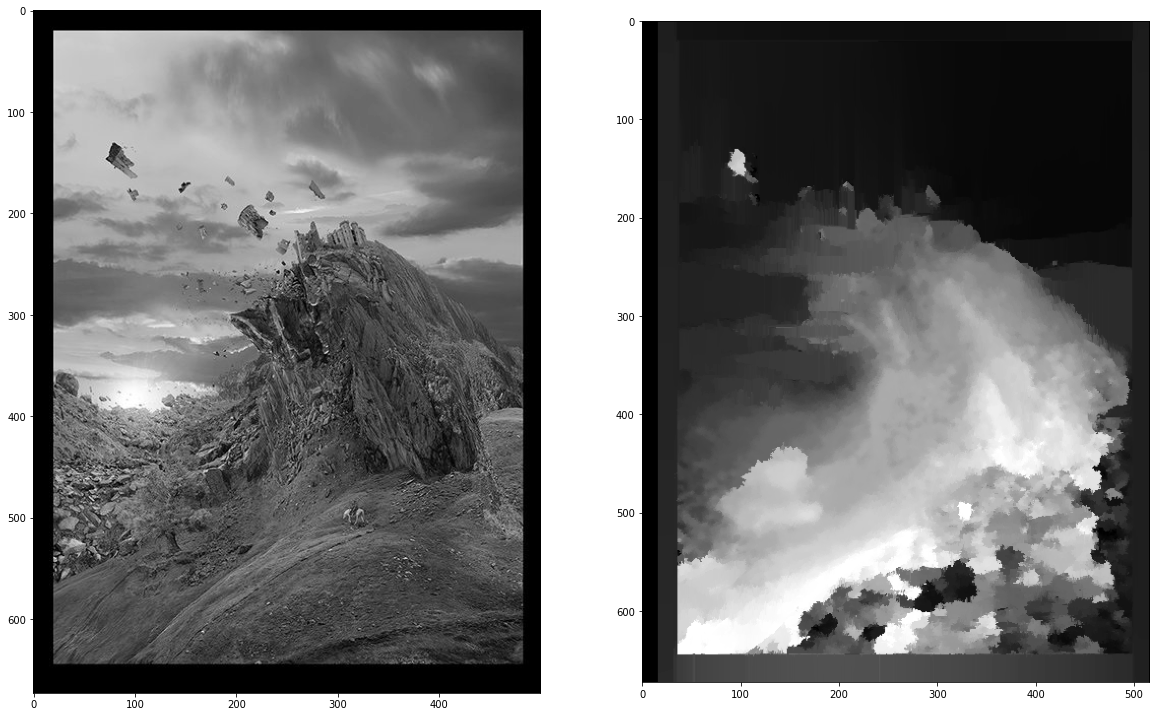

In [ ]:
# Parameters are defines and try changing then if result is not satisfying
resolution     = 1.0    #from 0 to 1.0 
numDisparities = 16     #should be multuple if 16
blockSize      = 5      #from 0 to 25
windowSize     = 5      #equal to block size
filterCap      = 63     #from 0 to 100  
lmbda          = 80000  #from 80000 to 100000  
sigma          = 1.2    
brightness     = 0      #from -1.0 to 1.0
contrast       = 1      #from 0.0 to 3.0

#Loading sterioscopic images 
imgL = cv2.imread('/content/drive/My Drive/l.jpg',0)
imgL = np.array(imgL, dtype=np.uint8) #images input are 32/16 bit but we need 8bit images so its conversion
imgR = cv2.imread('/content/drive/My Drive/r.png',0)
imgR = np.array(imgR, dtype=np.uint8) #images input are 32/16 bit but we need 8bit images so its conversion


#stereo matchers compare diaparity in both left and right images
left_matcher = cv2.StereoSGBM_create(
    minDisparity = 0,
    numDisparities = numDisparities,
    blockSize = blockSize,
    P1 = 8 * 3 * windowSize ** 2,
    P2 = 32 * 3 * windowSize ** 2,
    disp12MaxDiff = 1,
    uniquenessRatio = 15,
    speckleWindowSize = 0,
    speckleRange = 2,
    preFilterCap = filterCap,
    mode = cv2.STEREO_SGBM_MODE_HH 
)

right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)

# detect inaccurate disparity values and invalidate them
wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left = left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)

#disparity filter to deal with stereo-matching
dispr = right_matcher.compute(imgR, imgL)

#post-filtering on image
imgLb = cv2.copyMakeBorder(imgL, top = 0, bottom = 0, left = np.uint16(numDisparities / resolution), right = 0, borderType= cv2.BORDER_CONSTANT, value = [155,155,155])
filteredImg = wls_filter.filter(displ, imgLb, None, dispr)

#Adjustment made on image like- brightness,shaarpness
filteredImg = filteredImg * resolution
filteredImg = filteredImg + (brightness / 100.0)
filteredImg = (filteredImg - 128) * contrast + 128
filteredImg = np.clip(filteredImg, 0, 255)
filteredImg = np.uint8(filteredImg)

#output function
plt.figure(1, figsize=(20, 20))
plt.subplot(121)
plt.imshow(imgL,'gray')
plt.subplot(122)
plt.imshow(filteredImg,'gray')
plt.show()



**IF ABOVE CODE DIDN'T WORK RUN THIS ONE**

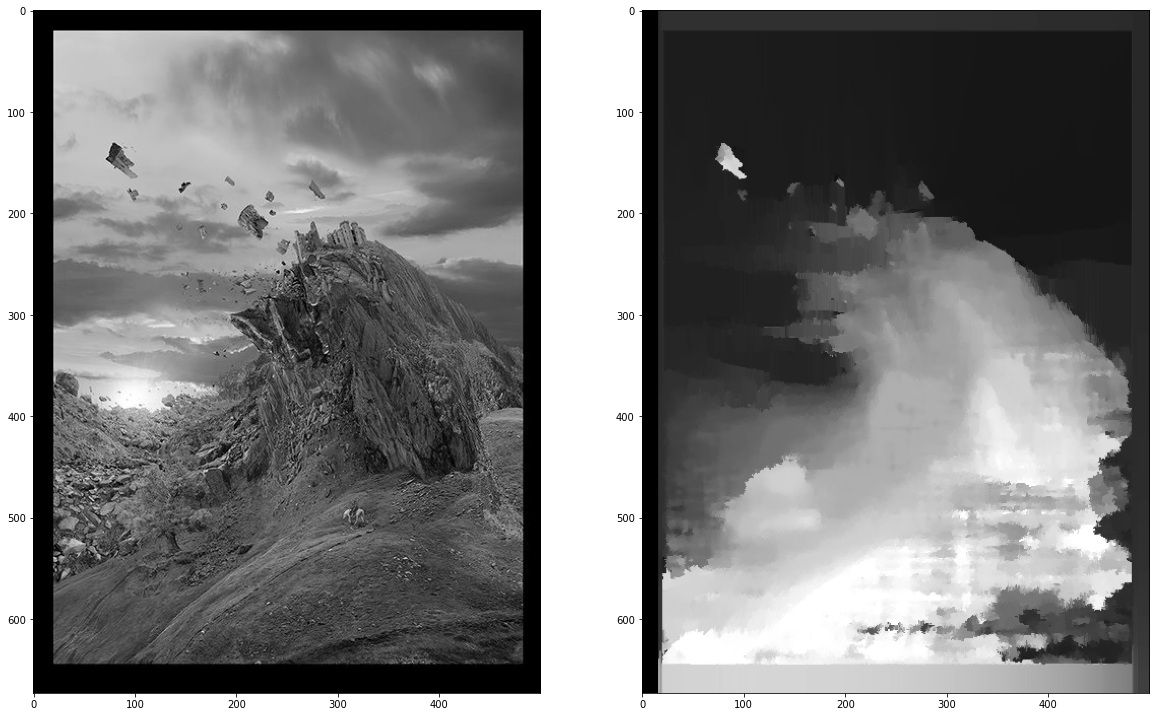

In [ ]:
#Loading sterioscopic images 
imgL = cv2.imread('/content/drive/My Drive/l.jpg',0)
imgR = cv2.imread('/content/drive/My Drive/r.png',0)
window_size = 5                   
 
#stereo matchers compare diaparity in both left and right images
left_matcher = cv2.StereoSGBM_create(
    minDisparity = 0,
    numDisparities = 16,             
    blockSize = 5,
    P1=8 * 3 * window_size ** 2,    
    P2=32 * 3 * window_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=15,
    speckleWindowSize=0,
    speckleRange=0,
    preFilterCap=2,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)

right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)

# Parameters are defines and try changing then if result is not satisfying
lmbda = 80000
sigma = 1.4
visual_multiplier = 1.0

# detect inaccurate disparity values and invalidate them 
wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)

#disparity filter to deal with stereo-matching
displ = left_matcher.compute(imgL, imgR) 
dispr = right_matcher.compute(imgR, imgL) 
displ = np.int16(displ)
dispr = np.int16(dispr)

#post-filtering on image
filteredImg = wls_filter.filter(displ, imgL, None, dispr)  
filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
filteredImg = np.uint8(filteredImg)

#output image function
plt.figure(1, figsize=(20, 20))
plt.subplot(121)
plt.imshow(imgL,'gray')
plt.subplot(122)
plt.imshow(filteredImg,'gray')
plt.show()